## Import Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from datetime import datetime
from pathlib import Path
import pandas as pd

import torchtext.data as ttd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
folder=Path('/content/gdrive/My Drive/Teaching/NLP/8_Sequence_Code')

In [4]:
df = pd.read_csv(folder / 'airline.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,Id,text,Target
0,1,@USAirways ! THE WORST in customer service. @...,-1
1,2,@united call wait times are over 20 minutes an...,-1
2,3,@JetBlue what's up with the random delay on fl...,-1
3,4,@AmericanAir Good morning! Wondering why my p...,0
4,5,@united UA 746. Pacific Rim and Date Night cut...,-1


In [6]:
# drop unnecessary columns
df = df.drop(["Id"], axis=1)

In [7]:
df.head()

,text,Target
0,@USAirways ! THE WORST in customer service. @...,-1
1,@united call wait times are over 20 minutes an...,-1
2,@JetBlue what's up with the random delay on fl...,-1
3,@AmericanAir Good morning! Wondering why my p...,0
4,@united UA 746. Pacific Rim and Date Night cut...,-1


In [8]:
df['Target']= df['Target'] +1

In [9]:
df['Target'].value_counts()

0    4566
1    1536
2    1218
Name: Target, dtype: int64

In [10]:
df.columns = ['data', 'labels']

In [11]:
df.head()

,data,labels
0,@USAirways ! THE WORST in customer service. @...,0
1,@united call wait times are over 20 minutes an...,0
2,@JetBlue what's up with the random delay on fl...,0
3,@AmericanAir Good morning! Wondering why my p...,1
4,@united UA 746. Pacific Rim and Date Night cut...,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['data'], df['labels'], test_size=0.3)

In [13]:
print(X_train.shape,y_train.shape)

(5124,) (5124,)


In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)

In [15]:
print(len(X_train_tok)) # it is a list , does not have shape attribute

5124


In [16]:
# get words in each review
train_review_lengths = [len(x) for x in X_train_tok]
test_teview_lengths = [len(x) for x in X_test_tok]

In [17]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print(f'Unique Tokens {V}')

Unique Tokens 8442


In [18]:
# pad sequences so that we get a N x T matrix

# This function transforms a list (of length num_samples) of sequences (lists of integers).
# into a 2D Numpy array of shape (num_samples, num_timesteps).
# num_timesteps is either the maxlen argument if provided,
# or the length of the longest sequence in the list.

X_train_tok_pad = pad_sequences(X_train_tok) 
print(f'Shape of X_train_tok_pad : {X_train_tok_pad.shape}')


Shape of X_train_tok_pad : (5124, 37)


In [19]:
# get sequence length
T = X_train_tok_pad.shape[1]
T

37

In [20]:
# X_test_tok_pad = pad_sequences(X_test_tok)
# print(f'Shape of X_test_tok_pad : {X_test_tok_pad.shape}')

In [21]:
X_test_tok_pad = pad_sequences(X_test_tok, maxlen=T)
print(f'Shape of X_test_tok_pad : {X_test_tok_pad.shape}')

Shape of X_test_tok_pad : (2196, 37)


In [22]:
X_train_tensor = torch.from_numpy(X_train_tok_pad).long() #int64
y_train_tensor = torch.from_numpy(y_train.to_numpy()) # pandas series to numpy , numpy to tensor
X_test_tensor = torch.from_numpy(X_test_tok_pad).long() # int64
y_test_tensor = torch.from_numpy(y_test.to_numpy())

In [23]:
# create dataset objects
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)

test_dataset = torch.utils.data.TensorDataset(X_test_tensor,y_test_tensor)

In [24]:
# Data loaders
train_iter = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=32, 
                                           shuffle=True)

test_iter = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=256, 
                                          shuffle=False)

In [25]:
for inputs, targets in train_iter:
  print("inputs:", inputs, "shape:", inputs.shape)
  print("targets:", targets, "shape:", targets.shape)
  break

inputs: tensor([[   0,    0,    0,  ...,   34,   35, 7568],
        [   0,    0,    0,  ...,   28, 1768,   48],
        [   0,    0,    0,  ...,  449,   65,  195],
        ...,
        [   0,    0,    0,  ...,  488, 1389, 5341],
        [   0,    0,    0,  ...,  808,  809, 3623],
        [   0,    0,    0,  ...,   31,   25, 2952]]) shape: torch.Size([32, 37])
targets: tensor([1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0,
        0, 0, 0, 1, 0, 2, 0, 2]) shape: torch.Size([32])


In [26]:
for inputs, targets in test_iter:
  print("inputs:", inputs)
  print("targets:", targets)
  break

inputs: tensor([[   0,    0,    0,  ...,   39,   34,   35],
        [   0,    0,    0,  ...,   62,   29,  158],
        [   0,    0,    0,  ...,   39,   34,   35],
        ...,
        [   0,    0,    0,  ...,  573,   61, 1425],
        [   0,    0,    0,  ...,   14,   76,  163],
        [   0,    0,    0,  ...,  432,   11,  137]])
targets: tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
        0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1,
        2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0,
        0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1,
        0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 2, 

In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [28]:
# Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True)
    self.fc = nn.Linear(self.M, self.K)
  
  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes into word vectors
    out = self.embed(X)

    # get RNN unit output
    out, _ = self.rnn(out, (h0, c0))

    # max pool
    out, _ = torch.max(out, 1)

    # we only want h(T) at the final time step
    out = self.fc(out)
    return out

In [29]:
model = RNN(V+1, 300, 100, 1, 3) # V= len(vocab) + 1 for (padding)
model.to(device)

RNN(
  (embed): Embedding(8443, 300)
  (rnn): LSTM(300, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=3, bias=True)
)

## Model Summary

In [30]:
print(model)

RNN(
  (embed): Embedding(8443, 300)
  (rnn): LSTM(300, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=3, bias=True)
)


## Model Parameters

In [31]:
for name, param in model.named_parameters():
  print(name, param.shape)

embed.weight torch.Size([8443, 300])
rnn.weight_ih_l0 torch.Size([400, 300])
rnn.weight_hh_l0 torch.Size([400, 100])
rnn.bias_ih_l0 torch.Size([400])
rnn.bias_hh_l0 torch.Size([400])
fc.weight torch.Size([3, 100])
fc.bias torch.Size([3])


## Training Loop

In [32]:
learning_rate = 0.01
epochs=65
# STEP 5: INSTANTIATE LOSS CLASS
criterion = nn.CrossEntropyLoss()

# STEP 6: INSTANTIATE OPTIMIZER CLASS

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# STEP 7: TRAIN THE MODEL

train_losses= np.zeros(epochs)
test_losses= np.zeros(epochs)


for epoch in range(epochs):
  
  t0= datetime.now()
  train_loss=[]
  
  model.train()
  for input,targets in train_iter:
    # load input and output to GPU
    input = input.to(device)
    targets= targets.to(device)
    
    # forward pass
    output= model(input)
    loss=criterion(output,targets)

    # set gradients to zero 
    optimizer.zero_grad()

    # backward pass
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
  
  train_loss=np.mean(train_loss)
      
  test_loss=[]
  model.eval()
  with torch.no_grad():
    for input,targets in test_iter:
      # load input and output to GPU
      input = input.to(device)
      targets= targets.to(device)
      
  
      # forward pass
      output= model(input)
      loss=criterion(output,targets)
      test_loss.append(loss.item())

    test_loss=np.mean(test_loss)
  
  # save Losses
  train_losses[epoch]= train_loss
  test_losses[epoch]= test_loss
  dt= datetime.now()-t0
  print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}    Test Loss: {test_loss:.4f}, Duration: {dt}')

Epoch 1/65, Train Loss: 0.9069    Test Loss: 0.8860, Duration: 0:00:00.607989
Epoch 2/65, Train Loss: 0.8715    Test Loss: 0.8652, Duration: 0:00:00.561531
Epoch 3/65, Train Loss: 0.8535    Test Loss: 0.8475, Duration: 0:00:00.553470
Epoch 4/65, Train Loss: 0.8372    Test Loss: 0.8305, Duration: 0:00:00.550911
Epoch 5/65, Train Loss: 0.8243    Test Loss: 0.8163, Duration: 0:00:00.561731
Epoch 6/65, Train Loss: 0.8059    Test Loss: 0.8037, Duration: 0:00:00.554349
Epoch 7/65, Train Loss: 0.7923    Test Loss: 0.7909, Duration: 0:00:00.557908
Epoch 8/65, Train Loss: 0.7776    Test Loss: 0.7801, Duration: 0:00:00.560224
Epoch 9/65, Train Loss: 0.7680    Test Loss: 0.7691, Duration: 0:00:00.562109
Epoch 10/65, Train Loss: 0.7516    Test Loss: 0.7592, Duration: 0:00:00.565211
Epoch 11/65, Train Loss: 0.7405    Test Loss: 0.7515, Duration: 0:00:00.571913
Epoch 12/65, Train Loss: 0.7269    Test Loss: 0.7420, Duration: 0:00:00.565272
Epoch 13/65, Train Loss: 0.7138    Test Loss: 0.7312, Duratio

In [33]:
# Accuracy- write a function to get accuracy
# use this function to get train/test accuracy and print accuracy
def get_accuracy(train_iter, test_iter, model):
  model.eval()
  with torch.no_grad():
    correct_train=correct_test=0
    total_train=total_test=0
    
    for input, targets in train_iter:
      input= input.to(device)
      targets= targets.to(device)
      #input = input.view(-1, 784)
      output=model(input)
      _,indices = torch.max(output,dim=1)
      correct_train+= (targets==indices).sum().item()
      total_train += targets.shape[0]
    
    train_acc= correct_train/total_train

    for input, targets in test_iter:
      input= input.to(device)
      targets= targets.to(device)
      #input = input.view(-1, 784)
      output=model(input)
      _,indices = torch.max(output,dim=1)
      correct_test+= (targets==indices).sum().item()
      total_test += targets.shape[0]
    
    test_acc= correct_test/total_test
    return train_acc, test_acc

In [34]:
train_acc, test_acc = get_accuracy(train_iter, test_iter, model)
print(f'Train acc: {train_acc:.4f},\t Test acc: {test_acc:.4f}')

Train acc: 0.9420,	 Test acc: 0.7673


In [35]:
# Write a function to get predictions

def get_predictions(test_iter, model):
  model.eval()
  with torch.no_grad():
    predictions= np.array([])
    y_test= np.array([])

    
    for input, targets in test_iter:
      input= input.to(device)
      targets= targets.to(device)
      
      output=model(input)
      _,indices = torch.max(output,dim=1)
      predictions=np.concatenate((predictions,indices.cpu().numpy())) 
      y_test = np.concatenate((y_test,targets.cpu().numpy())) 
      
  return y_test, predictions

In [36]:
y_test, predictions=get_predictions(test_iter, model)

In [37]:
predictions.max()

2.0

In [38]:
# We are using confusion metrics from sklearn
# we are done with model building and predictions
# let us convert test data set to numpy arrays now

#y_test=y_test.numpy()

cm=confusion_matrix(y_test,predictions)
cm

array([[1209,   99,   49],
       [ 161,  256,   57],
       [  93,   52,  220]])

In [39]:
# Write a function to print confusion matrix
# plot confusion matrix
# need to import confusion_matrix from sklearn for this function to work
# need to import seaborn as sns
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true,y_pred,normalize=None):
  cm=confusion_matrix(y_true,y_pred,normalize=normalize)
  fig, ax = plt.subplots(figsize=(6,5))
  if normalize == None:
    fmt='d'
    fig.suptitle('Confusion matrix without Normalization', fontsize=12)
        
  else :
    fmt='0.2f'
    fig.suptitle('Normalized confusion matrix', fontsize=12)
    
  ax=sns.heatmap(cm,cmap=plt.cm.Blues,annot=True,fmt=fmt)
  ax.axhline(y=0, color='k',linewidth=1)
  ax.axhline(y=cm.shape[1], color='k',linewidth=2)
  ax.axvline(x=0, color='k',linewidth=1)
  ax.axvline(x=cm.shape[0], color='k',linewidth=2)
 
  ax.set_xlabel('Predicted label', fontsize=12)
  ax.set_ylabel('True label', fontsize=12)

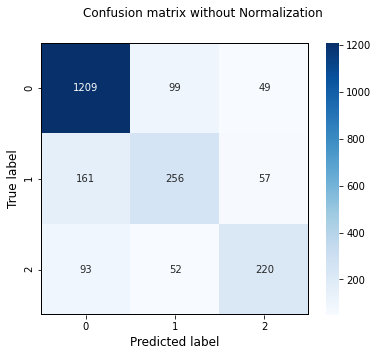

In [40]:
plot_confusion_matrix(y_test,predictions)